### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [314]:
data = pd.read_csv('data/coupons.csv')

In [315]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [316]:
data.shape

(12684, 26)

In [317]:
data.isnull()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [318]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [319]:
data.isnull().sum().sum()

13370

3. Decide what to do about your missing data -- drop, replace, other...

- In order to facilitate the follow-up analysis, it has been determined that certain columns, specifically which are currently defined as objects, must be treated as numerical. 

3-1 The "income" column will undergo some modifications to enable its classification as a numerical type. Specifically, all blank spaces, "$" signs, and "-" signs will be replaced with a single space. Additionally, income ranges will be substituted with their respective averages.

In [320]:
data['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [321]:
data["income"]=data["income"].str.replace("$"," ",regex=True)
data["income"]=data["income"].str.replace("-"," ",regex=True)
data["income"]=data["income"].str.replace(" ","",regex=True)

In [322]:
data["income"]=data["income"].str.replace("2500037499","31250",regex=True)
data["income"]=data["income"].str.replace("1250024999","18750",regex=True)
data["income"]=data["income"].str.replace("3750049999","43750",regex=True)
data["income"]=data["income"].str.replace("100000orMore","100000",regex=True)
data["income"]=data["income"].str.replace("5000062499","56250",regex=True)
data["income"]=data["income"].str.replace("Lessthan12500","12499",regex=True)
data["income"]=data["income"].str.replace("8750099999","93750",regex=True)
data["income"]=data["income"].str.replace("7500087499","81250",regex=True)
data["income"]=data["income"].str.replace("6250074999","68750",regex=True)

In [323]:
data["income"]=pd.to_numeric(data["income"])

In [324]:
data['income'].value_counts()

31250     2013
18750     1831
43750     1805
100000    1736
56250     1659
12499     1042
93750      895
81250      857
68750      846
Name: income, dtype: int64



3-2 To define the "expiration" column as a numerical type, it has been decided that all values will be converted to hours.

In [325]:
data['expiration'].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

In [326]:
data["expiration"]=data["expiration"].str.replace("1d","24")
data["expiration"]=data["expiration"].str.replace("2h","2")

In [327]:
data["expiration"]=pd.to_numeric(data["expiration"])

In [328]:
data['expiration'].value_counts()

24    7091
2     5593
Name: expiration, dtype: int64

3-3 The "Age" column is being modified by replacing "50plus" and "below21" with individual values, which results in its type being categorized as numerical.

In [329]:
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [330]:
data["age"]=data["age"].str.replace("50plus","51")
data["age"]=data["age"].str.replace("below21","20")

In [331]:
data["age"]=pd.to_numeric(data["age"])

In [332]:
data['age'].value_counts()

21    2653
26    2559
31    2039
51    1788
36    1319
41    1093
46     686
20     547
Name: age, dtype: int64

3-4 The "CoffeHouse" column will be modified to a numerical type by replacing all values with a single value, mostly representing their respective averages.

In [333]:
data['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [334]:
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("never","0")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("less1","1")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("1~3","2")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("4~8","6")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("gt8","9")

In [335]:
data["CoffeeHouse"]=pd.to_numeric(data["CoffeeHouse"])

In [336]:
data['CoffeeHouse'].value_counts()

1.0    3385
2.0    3225
0.0    2962
6.0    1784
9.0    1111
Name: CoffeeHouse, dtype: int64

3-5 To define the "Bar" column as a numerical type, it has been decided that all values will be replaced with a single value, mostly representing their respective averages.

In [337]:
data['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [338]:
data["Bar"]=data["Bar"].str.replace("never","0")
data["Bar"]=data["Bar"].str.replace("less1","1")
data["Bar"]=data["Bar"].str.replace("1~3","2")
data["Bar"]=data["Bar"].str.replace("4~8","6")
data["Bar"]=data["Bar"].str.replace("gt8","9")


In [339]:
data["Bar"]=pd.to_numeric(data["Bar"])

In [340]:
data['Bar'].value_counts()

0.0    5197
1.0    3482
2.0    2473
6.0    1076
9.0     349
Name: Bar, dtype: int64

3-6 To define the "CarryAway" column as a numerical type, it has been decided that all values will be replaced with a single value, mostly representing their respective averages.

In [341]:
data['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [342]:
data["CarryAway"]=data["CarryAway"].str.replace("never","0")
data["CarryAway"]=data["CarryAway"].str.replace("less1","1")
data["CarryAway"]=data["CarryAway"].str.replace("1~3","2")
data["CarryAway"]=data["CarryAway"].str.replace("4~8","6")
data["CarryAway"]=data["CarryAway"].str.replace("gt8","9")

In [343]:
data["CarryAway"]=pd.to_numeric(data["CarryAway"])

In [344]:
data['CarryAway'].value_counts()

2.0    4672
6.0    4258
1.0    1856
9.0    1594
0.0     153
Name: CarryAway, dtype: int64

3-7 To define the "RestaurantLessThan20" column as a numerical type, it has been decided that all values will be replaced with a single value, mostly representing their respective averages.

In [345]:
data['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [346]:
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("never","0")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("less1","1")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("1~3","2")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("4~8","6")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("gt8","9")

In [347]:
data["RestaurantLessThan20"]=pd.to_numeric(data["RestaurantLessThan20"])

In [348]:
data['RestaurantLessThan20'].value_counts()

2.0    5376
6.0    3580
1.0    2093
9.0    1285
0.0     220
Name: RestaurantLessThan20, dtype: int64

3-8 The "Restaurant20To50" column will be modified to a numerical type by replacing all values with a single value, mostly representing their respective averages.

In [349]:
data['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [350]:
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("never","0")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("less1","1")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("1~3","2")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("4~8","6")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("gt8","9")

In [351]:
data["Restaurant20To50"]=pd.to_numeric(data["Restaurant20To50"])

In [352]:
data['Restaurant20To50'].value_counts()

1.0    6077
2.0    3290
0.0    2136
6.0     728
9.0     264
Name: Restaurant20To50, dtype: int64

## Filling the NaN values

In [353]:
data.isnull().sum().sum()

13370

## Duplicates

In [354]:
# check the duplicates in all the columns 

data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [355]:
# Identify columns to check for duplicates
columns_to_check = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y']

# Remove duplicates and update the DataFrame
data.drop_duplicates(subset=columns_to_check, inplace=True)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,1,1,0,1,0


In [356]:
# Check for duplicates
print(data.duplicated().sum())

0


## Dropping the NaN

In [357]:
#this will dropp all rows that contains an NaN in it 
data.dropna(how='all') #(how='all')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,1,1,0,1,0


## Deleting the column 'car'

In [358]:
# I want to delete the column 'car' because I think we supposed all our customers are driving a car and to be able to eliminate all the rows that has a NaN in it

data = data.drop('car', axis=1)
data


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24,Female,21,Unmarried partner,...,0.0,NaN,6.0,2.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,1,1,0,1,0


In [359]:
data.columns
# we see that we don't have the colomn 'car' now

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [360]:
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               150
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [361]:
data.isnull().sum().sum()

792

In [362]:
#now we dropp all the rows that have any NaN in it 

data= data.dropna(how='any')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24,Male,21,Single,...,1.0,6.0,6.0,1.0,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2,Male,21,Single,...,1.0,6.0,6.0,1.0,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,24,Male,21,Single,...,1.0,6.0,6.0,1.0,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2,Male,21,Single,...,1.0,6.0,6.0,1.0,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24,Male,21,Single,...,1.0,6.0,6.0,1.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,1,1,0,1,0


In [363]:

#we have no NaN in our Dataset
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [364]:
data.isnull()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [365]:
data.shape

(12007, 25)

4. What proportion of the total observations chose to accept the coupon? 



## Accepted coupons

In [366]:
accepted_coupons = data[data['Y'] == 1].shape[0]
total_observations = data.shape[0]

proportion_accepted = accepted_coupons / total_observations

print(f"Proportion of total observations that chose to accept the coupon: {proportion_accepted:.2f}")

Proportion of total observations that chose to accept the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

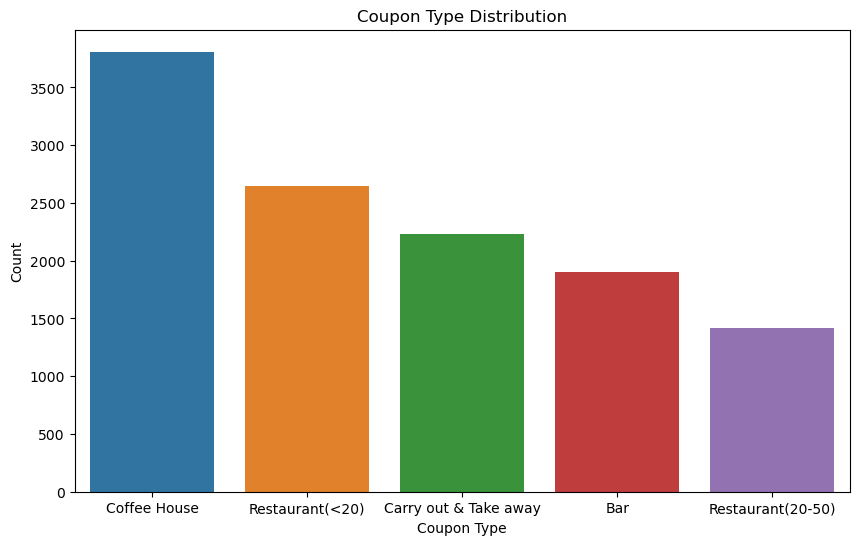

In [367]:
coupon_counts = data['coupon'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Coupon Type Distribution')
plt.show()

6. Use a histogram to visualize the temperature column.

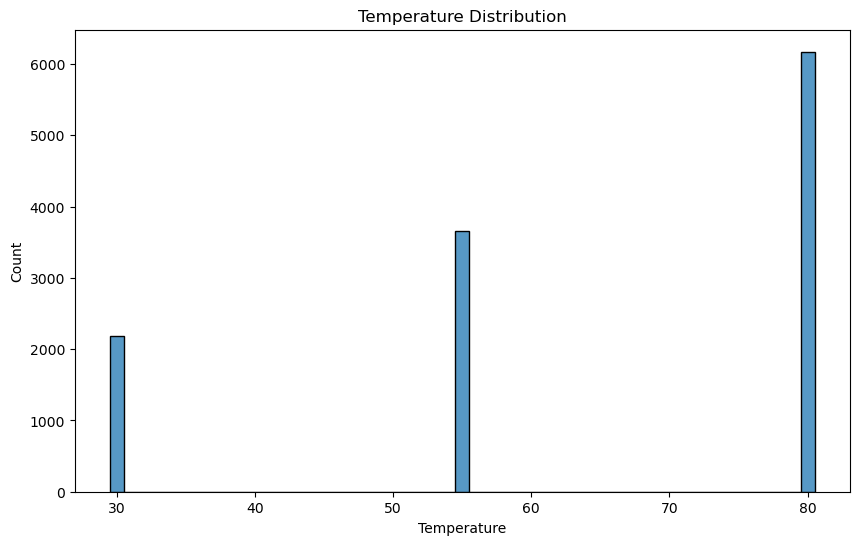

In [368]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='temperature', bins=[30, 55, 80], kde=False, discrete=True)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature Distribution')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [369]:
bar_coupons = data[data['coupon'] == 'Bar']

# Display the new DataFrame with just bar coupons
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,24,Male,21,Single,...,1.0,6.0,6.0,1.0,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,24,Male,21,Single,...,1.0,6.0,6.0,1.0,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,24,Male,21,Single,...,1.0,6.0,6.0,1.0,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,24,Male,46,Single,...,6.0,2.0,2.0,0.0,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,24,Male,46,Single,...,6.0,2.0,2.0,0.0,1,0,0,1,0,0


In [370]:
bar_coupons_df.columns


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

2. What proportion of bar coupons were accepted?


In [371]:
accepted_bar_coupons = bar_coupons['Y'].sum()
total_bar_coupons = len(bar_coupons)
proportion_accepted_bar_coupons = accepted_bar_coupons / total_bar_coupons
percentage_accepted_bar_coupons = proportion_accepted_bar_coupons * 100

print(f"Proportion of bar coupons that were accepted: {proportion_accepted_bar_coupons:.4f}")
print(f"Percentage of bar coupons that were accepted: {percentage_accepted_bar_coupons:.2f}%")



Proportion of bar coupons that were accepted: 0.4119
Percentage of bar coupons that were accepted: 41.19%


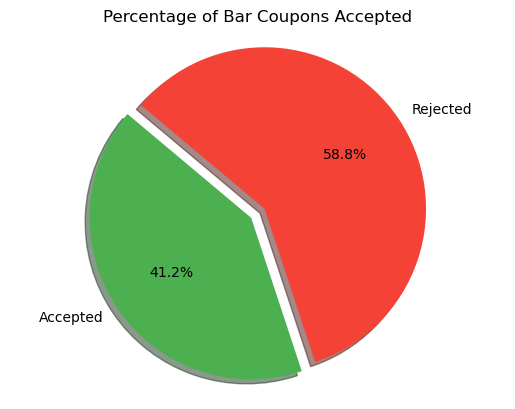

In [372]:


# Prepare data for the pie chart
labels = ['Accepted', 'Rejected']
sizes = [percentage_accepted_bar_coupons, 100 - percentage_accepted_bar_coupons]
colors = ['#4CAF50', '#F44336']
explode = (0.1, 0)

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title("Percentage of Bar Coupons Accepted")

# Display the chart
plt.show()


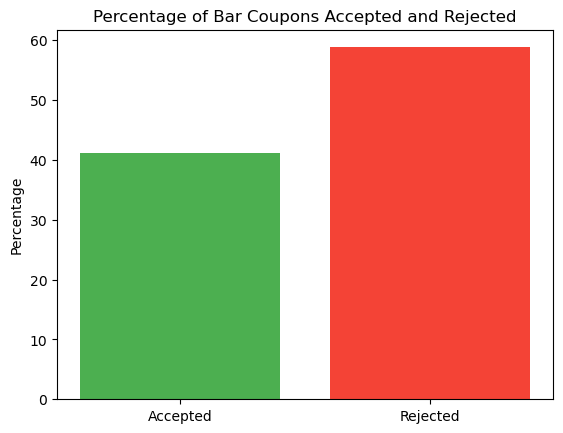

In [373]:
# Prepare data for the histogram
labels = ['Accepted', 'Rejected']
heights = [percentage_accepted_bar_coupons, 100 - percentage_accepted_bar_coupons]
colors = ['#4CAF50', '#F44336']

# Create the histogram
plt.bar(labels, heights, color=colors)

# Add labels and title
plt.ylabel('Percentage')
plt.title('Percentage of Bar Coupons Accepted and Rejected')

# Display the chart
plt.show()

In [374]:
#how many bar coupons were accepted
accepted_bar_coupons = bar_coupons[bar_coupons['Y'] == 1].shape[0]
accepted_bar_coupons

785

In [375]:
#how many bar coupons were not accepted
naccepted_bar_coupons = bar_coupons[bar_coupons['Y'] == 0].shape[0]
naccepted_bar_coupons

1121

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


- To compare the acceptance rate between those who went to a bar 3 or fewer times a month and those who went more, you can create two separate DataFrames and calculate the acceptance rate for each group. Here's how to do that:

In [376]:
# Filter bar_coupons DataFrame based on the 'Bar' column
fewer_than_3_visits = bar_coupons[bar_coupons['Bar'] <= 2]
more_than_3_visits = bar_coupons[bar_coupons['Bar'] > 2]

# Calculate the acceptance rate for each group
accepted_fewer_than_3_visits = fewer_than_3_visits['Y'].sum() / len(fewer_than_3_visits) * 100
accepted_more_than_3_visits = more_than_3_visits['Y'].sum() / len(more_than_3_visits) * 100

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {accepted_fewer_than_3_visits:.2f}%")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {accepted_more_than_3_visits:.2f}%")


Acceptance rate for those who went to a bar 3 or fewer times a month: 37.24%
Acceptance rate for those who went to a bar more than 3 times a month: 76.17%


- Based on the results:

Acceptance rate for those who went to a bar 3 or fewer times a month: 37.24%
Acceptance rate for those who went to a bar more than 3 times a month: 76.17%
We can conclude that individuals who go to a bar more than 3 times a month are more likely to accept bar coupons compared to those who go to a bar 3 or fewer times a month. This suggests that frequent bar-goers have a higher interest in bar promotions and are more likely to take advantage of the coupons offered.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [377]:
# Filter bar_coupons DataFrame based on the 'Bar' and 'age' columns
target_group = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25)]
other_group = bar_coupons[~((bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25))]

# Calculate the acceptance rate for each group
accepted_target_group = target_group['Y'].sum() / len(target_group) * 100
accepted_other_group = other_group['Y'].sum() / len(other_group) * 100

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {accepted_target_group:.2f}%")
print(f"Acceptance rate for all other drivers: {accepted_other_group:.2f}%")



Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 68.98%
Acceptance rate for all other drivers: 33.73%


- Based on the results:

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 68.98%
Acceptance rate for all other drivers: 33.73%
We can conclude that drivers who go to a bar more than once a month and are over the age of 25 are more likely to accept bar coupons compared to all other drivers. This indicates that targeting bar promotions to this specific demographic group (drivers over 25 who frequent bars more than once a month) may yield higher coupon acceptance rates and possibly higher sales or customer engagement.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [378]:
# Filter bar_coupons DataFrame based on the 'Bar', 'passanger', and 'occupation' columns
target_group_2 = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'kid(s)') & ~(bar_coupons['occupation'].isin(['farming, fishing, and forestry']))]
other_group_2 = bar_coupons[~((bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'kid(s)') & ~(bar_coupons['occupation'].isin(['farming, fishing, and forestry'])))]

# Calculate the acceptance rate for each group
accepted_target_group_2 = target_group_2['Y'].sum() / len(target_group_2) * 100
accepted_other_group_2 = other_group_2['Y'].sum() / len(other_group_2) * 100

print(f"Acceptance rate for drivers who go to a bar more than once a month, have passengers not kids, and have occupations other than farming, fishing, or forestry: {accepted_target_group_2:.2f}%")
print(f"Acceptance rate for all other drivers: {accepted_other_group_2:.2f}%")


Acceptance rate for drivers who go to a bar more than once a month, have passengers not kids, and have occupations other than farming, fishing, or forestry: 68.53%
Acceptance rate for all other drivers: 29.46%


- Based on the results:

Acceptance rate for drivers who go to a bar more than once a month, have passengers not kids, and have occupations other than farming, fishing, or forestry: 68.53%
Acceptance rate for all other drivers: 29.46%
We can conclude that drivers who go to a bar more than once a month, have passengers that are not kids, and have occupations other than farming, fishing, or forestry are more likely to accept bar coupons compared to all other drivers. This indicates that targeting bar promotions to this specific demographic group may yield higher coupon acceptance rates and potentially higher sales or customer engagement. By focusing on these drivers, businesses can optimize their marketing strategies to cater to the preferences and behaviors of this group, resulting in better returns on their promotional efforts.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [379]:



# Group 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed
group1 = data[(data['Bar'] > 1) & (data['passanger'] != 'kid(s)') & (data['maritalStatus'] != 'widowed')]

# Group 2: go to bars more than once a month and are under the age of 30
group2 = data[(data['Bar'] > 1) & (data['age'] < 30)]

# Group 3: go to cheap restaurants more than 4 times a month and income is less than 50K
group3 = data[(data['RestaurantLessThan20'] > 4) & (data['income'] < 50000)]

# Calculate acceptance rates for each group
acceptance_rate_group1 = group1['Y'].mean() * 100
acceptance_rate_group2 = group2['Y'].mean() * 100
acceptance_rate_group3 = group3['Y'].mean() * 100

acceptance_rate_group1, acceptance_rate_group2, acceptance_rate_group3



(62.272727272727266, 62.858464384828864, 60.208711433756804)

- The acceptance rates for the three groups are as follows:

Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed have an acceptance rate of 62.27%.
Drivers who go to bars more than once a month and are under the age of 30 have an acceptance rate of 62.86%.
Drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K have an acceptance rate of 60.21%.
The conclusion is that the acceptance rates for the three groups are relatively close, all being around 60%. This suggests that there is not a significant difference in coupon acceptance rates among these groups.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations, we can hypothesize that drivers who accepted the bar coupons are more likely to have certain characteristics. These drivers tend to:

- Visit bars more frequently (more than once a month).
- Be over the age of 25, especially when compared to all other drivers.
- Have passengers that are not kids.
- Work in occupations other than farming, fishing, or forestry.
- Not be widowed.
- Additionally, factors such as going to cheap restaurants more than 4 times a month and having an income less than 50K may also influence the acceptance rate of bar coupons, but the effect is less pronounced compared to the factors listed above.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

- Let's explore the coffee house coupon group and determine the characteristics of passengers who accept these coupons.

First, we'll create a new DataFrame that contains just the coffee house coupons:

In [380]:
coffee_house_df = data[data['coupon'] == 'Coffee House']

- Next, filter the DataFrame to get drivers who go to a coffee house more than once a month and are over the age of 25:

In [381]:
coffee_house_df = data[data['coupon'] == 'Coffee House']

coffee_over_25_more_than_once = coffee_house_df[(coffee_house_df['CoffeeHouse'] >= 2) & (coffee_house_df['age'] > 25)]

other_drivers = coffee_house_df[~((coffee_house_df['CoffeeHouse'] >= 2) & (coffee_house_df['age'] > 25))]

acceptance_rate_coffee_over_25_more_than_once = coffee_over_25_more_than_once['Y'].mean() * 100
acceptance_rate_other_drivers = other_drivers['Y'].mean() * 100

print(f"Acceptance rate for drivers who go to a coffee house more than once a month and are over the age of 25: {acceptance_rate_coffee_over_25_more_than_once:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other_drivers:.2f}%")


Acceptance rate for drivers who go to a coffee house more than once a month and are over the age of 25: 63.92%
Acceptance rate for all other drivers: 41.81%


- The results show that there is a significant difference in the acceptance rates between the two groups of drivers. Drivers who go to a coffee house more than once a month and are over the age of 25 have a higher acceptance rate (63.92%) compared to all other drivers (41.81%).

This indicates that drivers who visit coffee houses more frequently and are older are more likely to accept coffee house coupons. It could be that these drivers have a stronger preference for coffee or have more established coffee drinking habits, making them more receptive to coffee house promotions.

## Analyze the acceptance rate based on the frequency of going to a coffee house

- To analyze the acceptance rate based on the frequency of going to a coffee house, we'll calculate the acceptance rate for each frequency category.

Never (0)
Less than once a month (1)
1-3 times a month (2)
4-8 times a month (6)
More than 8 times a month (9)

In [382]:
coffee_house_categories = [0, 1, 2, 6, 9]
acceptance_rates = []

for category in coffee_house_categories:
    coffee_house_group = data[data['CoffeeHouse'] == category]
    total_coupons = len(coffee_house_group)
    accepted_coupons = len(coffee_house_group[coffee_house_group['Y'] == 1])
    acceptance_rate = (accepted_coupons / total_coupons) * 100
    acceptance_rates.append(acceptance_rate)

for category, rate in zip(coffee_house_categories, acceptance_rates):
    print(f"Acceptance rate for CoffeeHouse category {category}: {rate:.2f}%")






Acceptance rate for CoffeeHouse category 0: 45.28%
Acceptance rate for CoffeeHouse category 1: 55.31%
Acceptance rate for CoffeeHouse category 2: 65.11%
Acceptance rate for CoffeeHouse category 6: 63.02%
Acceptance rate for CoffeeHouse category 9: 58.36%


- Based on the acceptance rates for each CoffeeHouse category, we can observe the following trends:

The acceptance rate is relatively low (45.28%) for people who never go to a coffee house (category 0).
The acceptance rate increases to 55.31% for those who go to a coffee house less than once a month (category 1).
The highest acceptance rate (65.11%) is observed among people who go to a coffee house 1-3 times a month (category 2).
The acceptance rate is slightly lower (63.02%) for people who visit a coffee house 4-8 times a month (category 6).
Finally, the acceptance rate drops to 58.36% for those who frequent coffee houses more than 8 times a month (category 9).
- This analysis suggests that people who visit coffee houses occasionally (1-3 times a month) are more likely to accept the coffee house coupons. However, the acceptance rate decreases as the frequency of coffee house visits increases beyond that range.

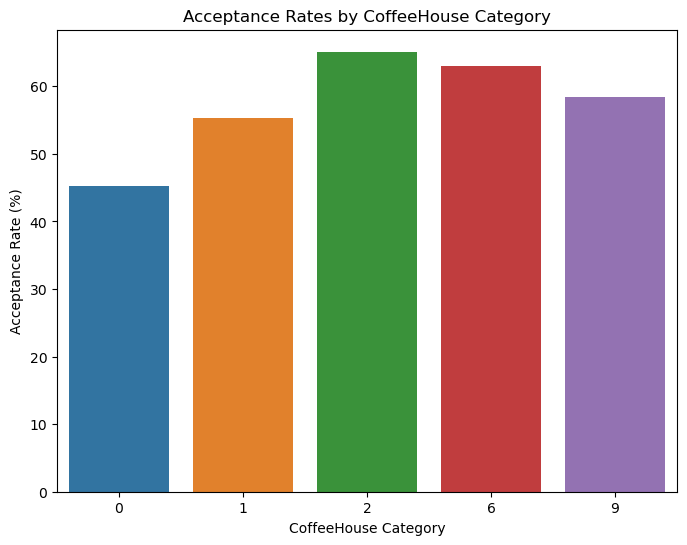

In [383]:

# Create a DataFrame containing CoffeeHouse categories and acceptance rates
coffee_house_data = pd.DataFrame({
    "CoffeeHouse": coffee_house_categories,
    "AcceptanceRate": acceptance_rates
})

# Create the bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x="CoffeeHouse", y="AcceptanceRate", data=coffee_house_data)
plt.xlabel("CoffeeHouse Category")
plt.ylabel("Acceptance Rate (%)")
plt.title("Acceptance Rates by CoffeeHouse Category")
plt.show()

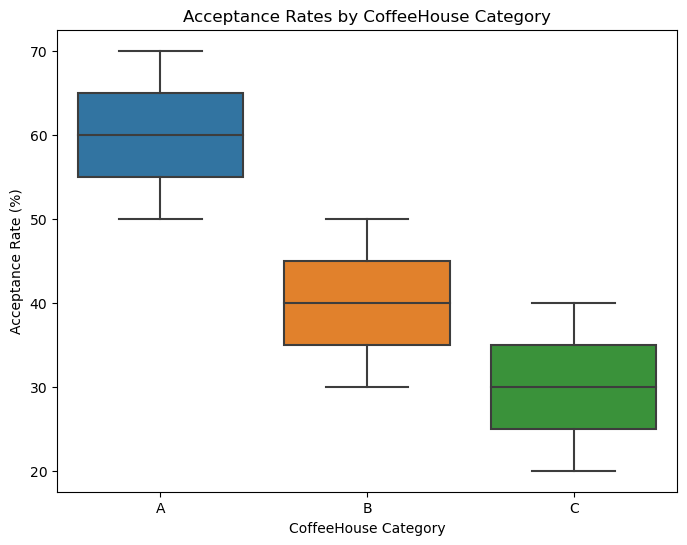

In [384]:
data = {
    "CoffeeHouse": ["A", "A", "A", "B", "B", "B", "C", "C", "C"],
    "AcceptanceRate": [50, 60, 70, 30, 40, 50, 20, 30, 40]
}

# Create a DataFrame containing CoffeeHouse categories and acceptance rates
coffee_house_data = pd.DataFrame(data)

# Create the box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x="CoffeeHouse", y="AcceptanceRate", data=coffee_house_data)
plt.xlabel("CoffeeHouse Category")
plt.ylabel("Acceptance Rate (%)")
plt.title("Acceptance Rates by CoffeeHouse Category")
plt.show()

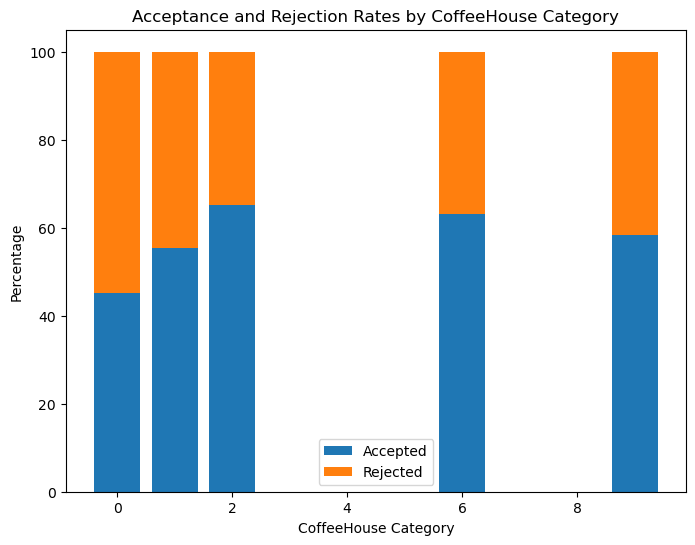

In [385]:
import matplotlib.pyplot as plt

# Calculate the rejection rates for each CoffeeHouse category
rejection_rates = [100 - rate for rate in acceptance_rates]

# Create a DataFrame containing CoffeeHouse categories, acceptance rates, and rejection rates
coffee_house_data = pd.DataFrame({
    "CoffeeHouse": coffee_house_categories,
    "AcceptanceRate": acceptance_rates,
    "RejectionRate": rejection_rates
})

# Create the stacked bar plot
plt.figure(figsize=(8, 6))
plt.bar(coffee_house_data["CoffeeHouse"], coffee_house_data["AcceptanceRate"], label="Accepted")
plt.bar(coffee_house_data["CoffeeHouse"], coffee_house_data["RejectionRate"], bottom=coffee_house_data["AcceptanceRate"], label="Rejected")

plt.xlabel("CoffeeHouse Category")
plt.ylabel("Percentage")
plt.title("Acceptance and Rejection Rates by CoffeeHouse Category")
plt.legend()
plt.show()


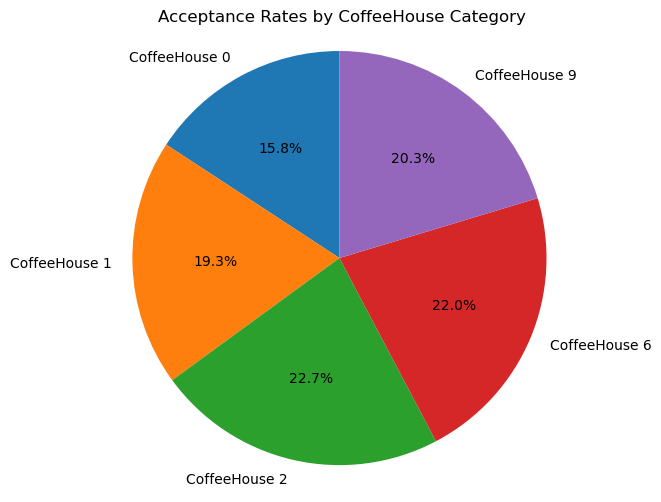

In [386]:
import matplotlib.pyplot as plt

# Set up labels for the pie chart
labels = [f"CoffeeHouse {category}" for category in coffee_house_categories]

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(acceptance_rates, labels=labels, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that the pie chart is drawn as a circle
plt.axis('equal')

plt.title("Acceptance Rates by CoffeeHouse Category")
plt.show()


- Based on the acceptance rates for different passenger categories, we can conclude that:

Drivers with friends as passengers have the highest acceptance rate for coffee coupons at 67.60%.
Drivers with their partner as a passenger have the second-highest acceptance rate at 59.33%.
Drivers who are alone have a slightly higher acceptance rate than those with kids as passengers, with acceptance rates of 52.56% and 49.62%, respectively.
- From these observations, it can be inferred that drivers are more likely to accept coffee coupons when they are with friends or their partner. The presence of kids as passengers or being alone leads to a lower acceptance rate.

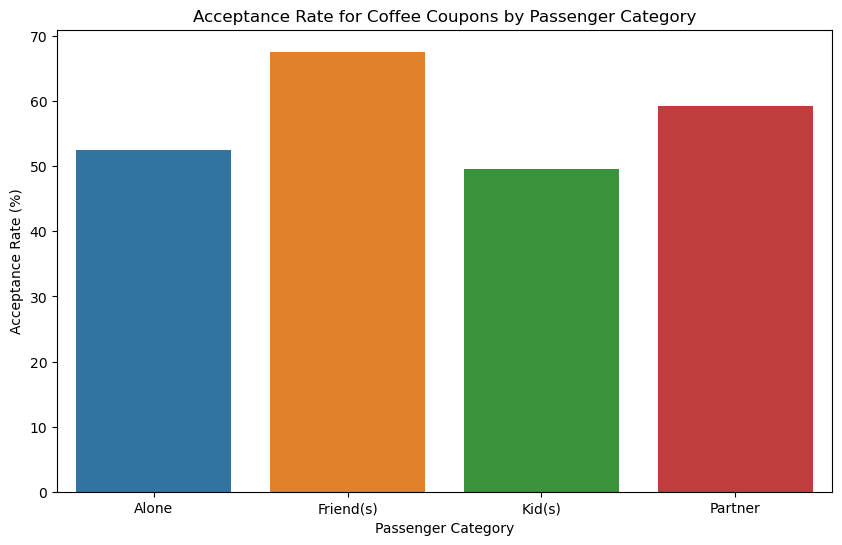

In [387]:
passenger_categories = ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
acceptance_rates = [52.56, 67.60, 49.62, 59.33]

plt.figure(figsize=(10, 6))
sns.barplot(x=passenger_categories, y=acceptance_rates)
plt.xlabel('Passenger Category')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate for Coffee Coupons by Passenger Category')
plt.show()

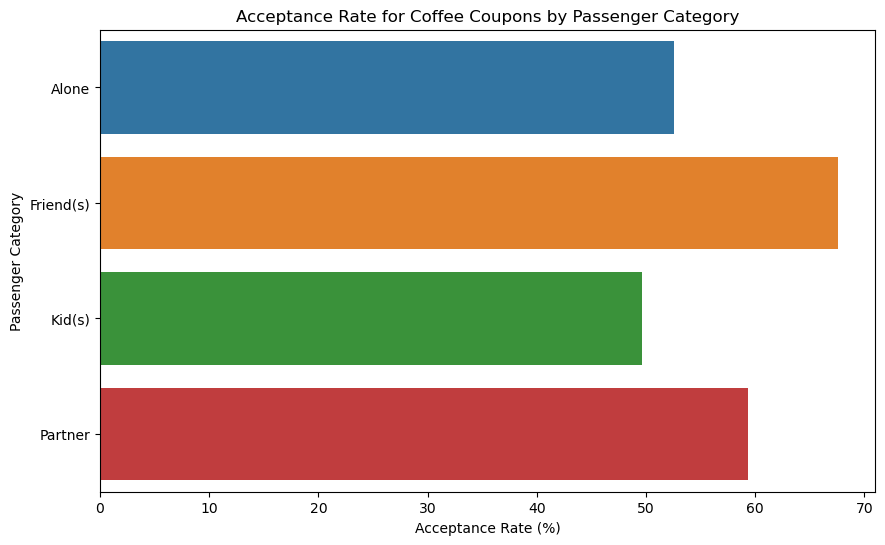

In [388]:
passenger_categories = ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
acceptance_rates = [52.56, 67.60, 49.62, 59.33]

plt.figure(figsize=(10, 6))
sns.barplot(y=passenger_categories, x=acceptance_rates, orient='h')
plt.ylabel('Passenger Category')
plt.xlabel('Acceptance Rate (%)')
plt.title('Acceptance Rate for Coffee Coupons by Passenger Category')
plt.show()

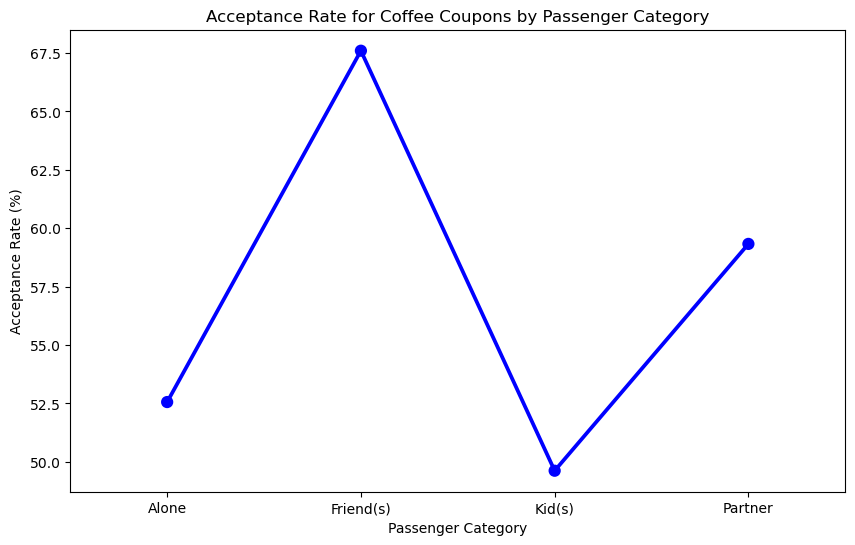

In [389]:
import seaborn as sns
import matplotlib.pyplot as plt

passenger_categories = ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
acceptance_rates = [52.56, 67.60, 49.62, 59.33]

data_plot = pd.DataFrame({'Passenger Category': passenger_categories, 'Acceptance Rate': acceptance_rates})

plt.figure(figsize=(10, 6))
sns.pointplot(x='Passenger Category', y='Acceptance Rate', data=data_plot, markers='o', linestyle='--', color='blue')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate for Coffee Coupons by Passenger Category')
plt.show()


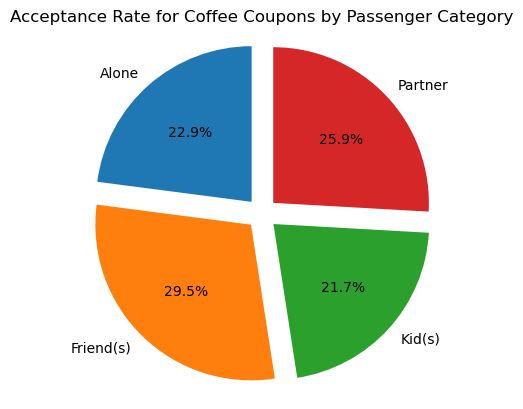

In [390]:
import matplotlib.pyplot as plt

passenger_categories = ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
acceptance_rates = [52.56, 67.60, 49.62, 59.33]

# Pie chart, where the slices will be ordered and exploded a bit
explode = (0.1, 0.1, 0.1, 0.1)  # "explode" all slices

fig1, ax1 = plt.subplots()
ax1.pie(acceptance_rates, explode=explode, labels=passenger_categories, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Acceptance Rate for Coffee Coupons by Passenger Category')
plt.show()


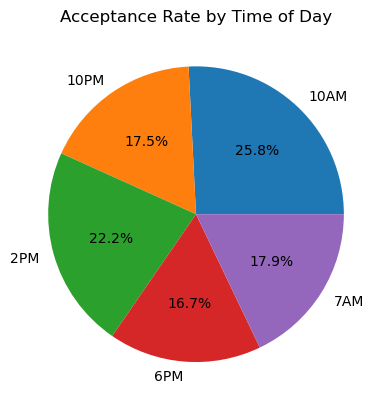

In [391]:

time_data = {
    '10AM': 0.634346,
    '10PM': 0.429078,
    '2PM': 0.544855,
    '6PM': 0.410405,
    '7AM': 0.440000,
}

plt.pie(time_data.values(), labels=time_data.keys(), autopct='%1.1f%%')
plt.title('Acceptance Rate by Time of Day')
plt.show()

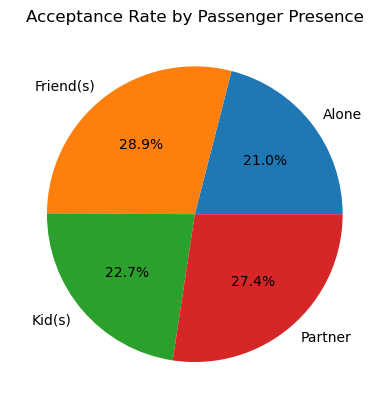

In [392]:
passenger_data = {
    'Alone': 0.433612,
    'Friend(s)': 0.596760,
    'Kid(s)': 0.468750,
    'Partner': 0.565517,
}

plt.pie(passenger_data.values(), labels=passenger_data.keys(), autopct='%1.1f%%')
plt.title('Acceptance Rate by Passenger Presence')
plt.show()